## imports and files

In [1]:
import pandas as pd
import os
import sys
from pprint import PrettyPrinter
import matplotlib.pyplot as plt
from typing import Dict, List

pp = PrettyPrinter(indent=4)

# get an absolute path to the directory that contains parent files
__file__ = globals()["_dh"][0]
project_dir = __file__ = globals()["_dh"][0]
sys.path.append(os.path.normpath(os.path.join(project_dir, "..", "..", "..", "..")))

from experiments.utils.constants import PIPELINE_PROFILING_RESULTS_PATH
from experiments.utils.parser import Parser

In [2]:
series = 5
config_key_mapper = "key_config_mapper.csv"

series_path = os.path.join(PIPELINE_PROFILING_RESULTS_PATH, "series", str(series))

loader = Parser(
    series_path=series_path,
    config_key_mapper=config_key_mapper,
    model_name="video",
    type_of="router_pipeline",
)

In [3]:
configs = loader.load_configs()
for config_name, config in configs.items():
    print(f"File name: {config_name}")
    pp.pprint(config)

File name: 0.yaml
{   'benchmark_duration': 1,
    'central_queue': True,
    'distrpution_time': 10,
    'metadata': 'repeat 20 with 4 router',
    'mode': 'exponential',
    'nodes': [   {   'cpu_request': ['1'],
                     'data_type': 'image',
                     'max_batch_size': ['8'],
                     'max_batch_time': ['1'],
                     'memory_request': ['2Gi'],
                     'model_variants': ['yolov5n'],
                     'node_name': 'yolo',
                     'num_interop_threads': ['1'],
                     'num_threads': ['1'],
                     'replicas': [4],
                     'use_threading': 'True'},
                 {   'cpu_request': ['1'],
                     'data_type': 'text',
                     'max_batch_size': ['8'],
                     'max_batch_time': ['1'],
                     'memory_request': ['2Gi'],
                     'model_variants': ['resnet18'],
                     'node_name': 'resnet-human',
 

## config map reader

In [4]:
key_config_df = loader.key_config_mapper()
# display(key_config_df)
key_config_df.columns
results = loader.result_processing()

In [5]:
results

,experiment_id,client_to_router_latencies_avg,client_to_router_latencies_p99,client_to_router_latencies_p95,client_to_router_latencies_p50,client_to_router_latencies_var,client_to_router_latencies_max,client_to_router_latencies_min,router_to_task_0_latencies_avg,router_to_task_0_latencies_p99,...,task_1_memory_usage_var,task_1_memory_usage_max,task_1_memory_usage_min,task_1_throughput_avg,task_1_throughput_p99,task_1_throughput_p95,task_1_throughput_p50,task_1_throughput_var,task_1_throughput_max,task_1_throughput_min
0,1,0.023469,0.129417,0.043878,0.020898,0.000294,0.152563,0.005111,0.345438,1.046158,...,2.177699e+16,446627840.0,3461120.0,0.479045,0.983333,0.9475,0.47741,0.094548,0.983333,0.0


In [6]:
for item in results.columns:
    print(item)

experiment_id
client_to_router_latencies_avg
client_to_router_latencies_p99
client_to_router_latencies_p95
client_to_router_latencies_p50
client_to_router_latencies_var
client_to_router_latencies_max
client_to_router_latencies_min
router_to_task_0_latencies_avg
router_to_task_0_latencies_p99
router_to_task_0_latencies_p95
router_to_task_0_latencies_p50
router_to_task_0_latencies_var
router_to_task_0_latencies_max
router_to_task_0_latencies_min
task_0_model_latencies_avg
task_0_model_latencies_p99
task_0_model_latencies_p95
task_0_model_latencies_p50
task_0_model_latencies_var
task_0_model_latencies_max
task_0_model_latencies_min
task_0_to_task_1_latencies_avg
task_0_to_task_1_latencies_p99
task_0_to_task_1_latencies_p95
task_0_to_task_1_latencies_p50
task_0_to_task_1_latencies_var
task_0_to_task_1_latencies_max
task_0_to_task_1_latencies_min
task_1_model_latencies_avg
task_1_model_latencies_p99
task_1_model_latencies_p95
task_1_model_latencies_p50
task_1_model_latencies_var
task_1_mode

In [7]:
experiment_id = 1
experiment_results = loader.get_experiment_detail(experiment_id=experiment_id)
# display(experiment_results)
# -------------------------
experiment_results.keys()
filenames = loader.get_result_file_names()
# display(filenames)
# -------------------------
results = loader._read_results()
# display(results.keys())
# -------------------------
flattened_results = loader.flatten_results(results["1"]["responses"])
# display(flattened_results)
# -------------------------
experiment_id = 1
_, flattened_results = loader.flatten_results(results[str(experiment_id)]["responses"])
latencies, timeout_count = loader.latency_calculator(flattened_results)
# display(pd.DataFrame(latencies))
# -------------------------
results = loader.result_processing()
# print(results)
# print(list(results.columns))
for item in list(results.columns):
    if "task_0" in item:
        print(item)
# -------------------------
for item in results.columns:
    print(item)
# -------------------------
# experiment_id = 1
# _, flattened_results = loader.flatten_results(results[str(experiment_id)]["responses"])
# latencies, timeout_count = loader.latency_calculator(flattened_results)
# display(pd.DataFrame(latencies))
# -------------------------
# summary = loader.latency_summary(latencies=latencies)
# pd.DataFrame(list(summary.items()))

router_to_task_0_latencies_avg
router_to_task_0_latencies_p99
router_to_task_0_latencies_p95
router_to_task_0_latencies_p50
router_to_task_0_latencies_var
router_to_task_0_latencies_max
router_to_task_0_latencies_min
task_0_model_latencies_avg
task_0_model_latencies_p99
task_0_model_latencies_p95
task_0_model_latencies_p50
task_0_model_latencies_var
task_0_model_latencies_max
task_0_model_latencies_min
task_0_to_task_1_latencies_avg
task_0_to_task_1_latencies_p99
task_0_to_task_1_latencies_p95
task_0_to_task_1_latencies_p50
task_0_to_task_1_latencies_var
task_0_to_task_1_latencies_max
task_0_to_task_1_latencies_min
task_0_cpu_usage_count_avg
task_0_cpu_usage_count_p99
task_0_cpu_usage_count_p95
task_0_cpu_usage_count_p50
task_0_cpu_usage_count_var
task_0_cpu_usage_count_max
task_0_cpu_usage_count_min
task_0_cpu_usage_rate_avg
task_0_cpu_usage_rate_p99
task_0_cpu_usage_rate_p95
task_0_cpu_usage_rate_p50
task_0_cpu_usage_rate_var
task_0_cpu_usage_rate_max
task_0_cpu_usage_rate_min
task_0

In [8]:
key_config_df = loader.key_config_mapper()
print(key_config_df.columns)
# selected_key_config_df =  key_config_df[key_config_df['model_variant_1'] == 'yolov5n']
# selected_key_config_df
key_config_df

Index(['experiment_id', 'pipeline_name', 'load', 'load_duration', 'series',
       'metadata', 'mode', 'data_type', 'benchmark_duration',
       'task_0_node_name', 'task_0_model_variant', 'task_0_cpu_request',
       'task_0_memory_request', 'task_0_max_batch_size',
       'task_0_max_batch_time', 'task_0_replica', 'task_1_node_name',
       'task_1_model_variant', 'task_1_cpu_request', 'task_1_memory_request',
       'task_1_max_batch_size', 'task_1_max_batch_time', 'task_1_replica'],
      dtype='object')


,experiment_id,pipeline_name,load,load_duration,series,metadata,mode,data_type,benchmark_duration,task_0_node_name,...,task_0_max_batch_size,task_0_max_batch_time,task_0_replica,task_1_node_name,task_1_model_variant,task_1_cpu_request,task_1_memory_request,task_1_max_batch_size,task_1_max_batch_time,task_1_replica
0,1,video,30,60,5,repeat 20 with 4 router,exponential,image,1,yolo,...,8,1,4,resnet-human,resnet18,1,2Gi,8,1,4


In [9]:
def draw_dicts(dict_to_draw: Dict[str, List[int]], adaptation_interval=None):
    num_keys = len(dict_to_draw.keys())
    fig, axs = plt.subplots(nrows=num_keys, ncols=1, figsize=(10, num_keys * 2))
    x_values = range(len(list(dict_to_draw.values())[0]))
    if adaptation_interval is not None:
        x_values = [item * adaptation_interval for item in list(x_values)]
    if num_keys > 1:
        for i, key in enumerate(dict_to_draw.keys()):
            axs[i].plot(x_values, dict_to_draw[key], label=key)
            axs[i].set_title(key)
            axs[i].legend()
    else:
        key = list(dict_to_draw.keys())[0]
        axs.plot(x_values, dict_to_draw[key], label=key)
        axs.set_title(key)
        axs.legend()

    plt.tight_layout()
    plt.show()

In [10]:
experiment_id = 1
timeout_per_second, per_second_results = loader.per_second_result_processing(experiment_id=experiment_id)

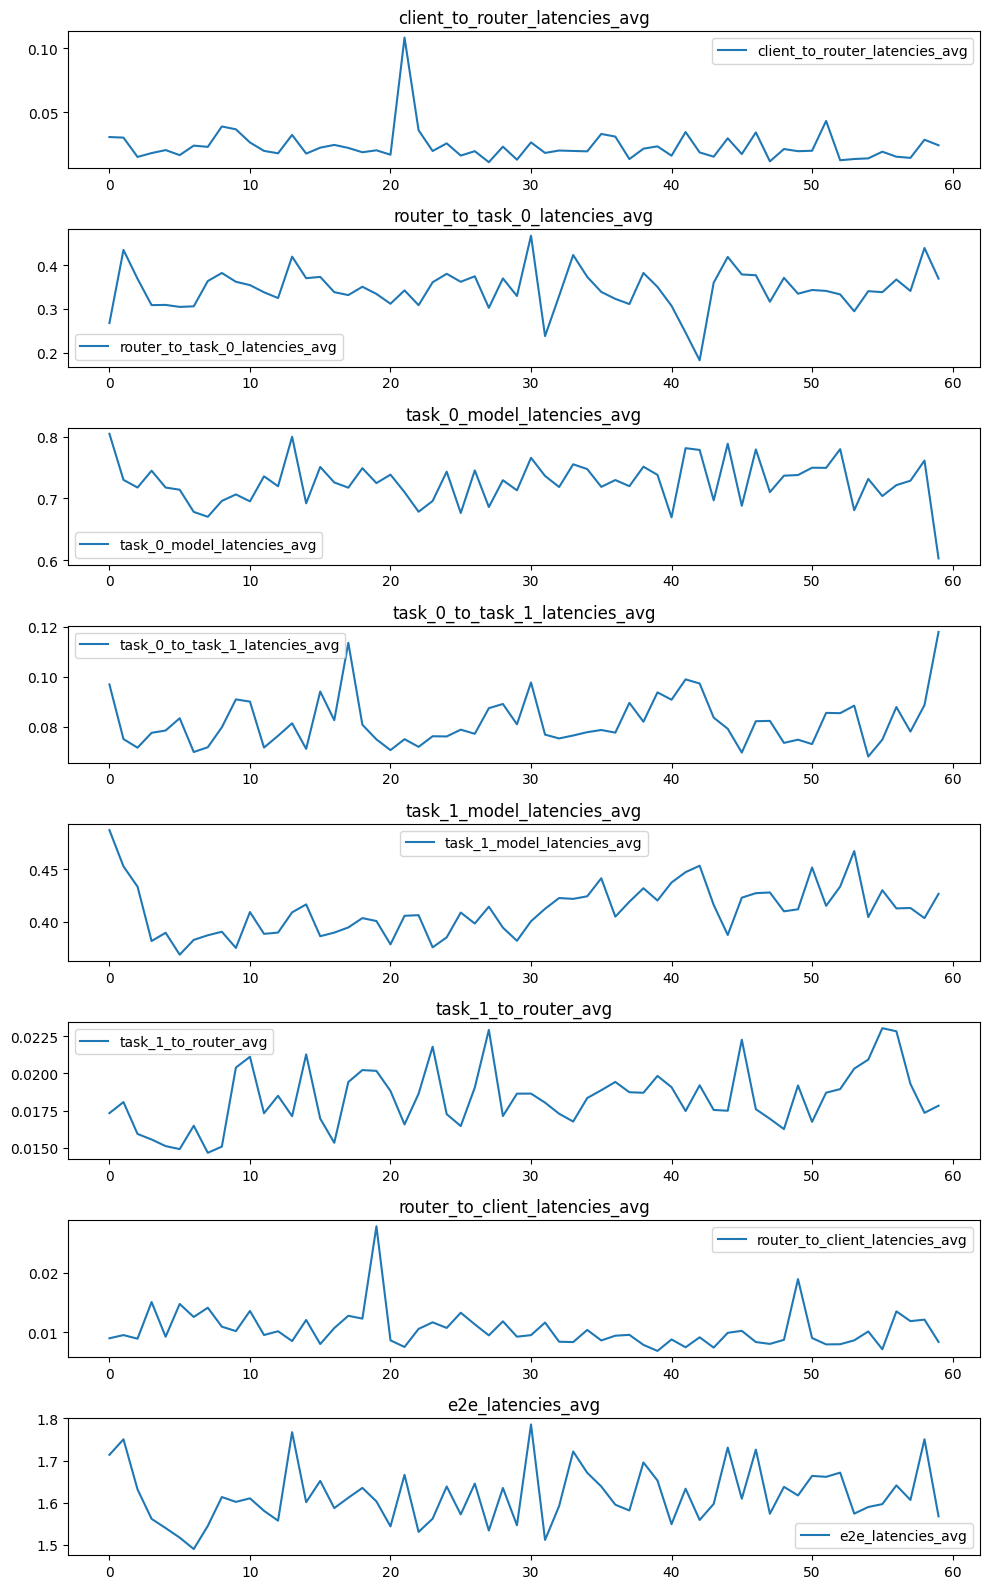

In [11]:
p99_cols = list(filter(lambda col: "avg" in col, per_second_results.columns))
p99_all = per_second_results[p99_cols]  # [1400:]
# p99_all["p99_e2e"] = p99_all.sum(axis=1).to_list()
draw_dicts(p99_all.to_dict(orient="list"))

In [12]:
per_second_results.keys()

Index(['client_to_router_latencies_avg', 'client_to_router_latencies_p99',
       'client_to_router_latencies_p95', 'client_to_router_latencies_p50',
       'client_to_router_latencies_var', 'client_to_router_latencies_max',
       'client_to_router_latencies_min', 'router_to_task_0_latencies_avg',
       'router_to_task_0_latencies_p99', 'router_to_task_0_latencies_p95',
       'router_to_task_0_latencies_p50', 'router_to_task_0_latencies_var',
       'router_to_task_0_latencies_max', 'router_to_task_0_latencies_min',
       'task_0_model_latencies_avg', 'task_0_model_latencies_p99',
       'task_0_model_latencies_p95', 'task_0_model_latencies_p50',
       'task_0_model_latencies_var', 'task_0_model_latencies_max',
       'task_0_model_latencies_min', 'task_0_to_task_1_latencies_avg',
       'task_0_to_task_1_latencies_p99', 'task_0_to_task_1_latencies_p95',
       'task_0_to_task_1_latencies_p50', 'task_0_to_task_1_latencies_var',
       'task_0_to_task_1_latencies_max', 'task_0_to_t